### Sprawozdanie - Minimalizacja funkcji
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Problem komiwojażera

Wygeneruj chmurę $n$ losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania
 do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.

<br>

1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości $n$ oraz 3 różnych układów punktów w 2D
 - rozkład jednostajny,
 - rozkład normalny z czterema różnymi grupami parametrów,
 - dziewięc odseparowanych grup punktów).

<br>

2. Zbadaj wpływ sposobu generacji sąsiedniego stanu

 - <center>*consecutive swap* - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce</center>

 <center>vs.</center>

 - <center>*arbitrary swap* - zamiana dwóch losowych wierzchołków w ścieżce)</center>

  oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.

<br>

3. Przedstaw wizualizację działania procedury minimalizującej funkcję celu (funkcja przekazana do metody dual_annealing może modyfikować zewnętrzny stan)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Rozpocznę od stworzenia "chmury" losowych punktów w 2D.

In [2]:
def stworz_chmure(tryb, n):
    punkty = []

    if tryb == "rozklad_jednostajny":
        for i in range(n):
            wylosowana_kropka = np.random.uniform(-10.0, 10.0, size=2)
            punkty.append(wylosowana_kropka)


    elif tryb == "rozklad_normalny":    ## z podziałem na 4 parametry

        ilosc_parametrow = 4

        wartosc_oczekiwana = np.random.uniform(-10.0, 10.0, ilosc_parametrow)
        odchylenie_standardowe = np.random.uniform(0.68, 4.0, ilosc_parametrow)

        for i in range(ilosc_parametrow):
            poczatek_przedzialu = int( np.floor(i * n / ilosc_parametrow) )
            koniec_przedzialu   = int( np.floor((i+1) * n / ilosc_parametrow) - 1 )

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.normal(loc=wartosc_oczekiwana[i], scale=odchylenie_standardowe[i], size=2)
                punkty.append(wylosowana_kropka)

                iterator += 1


    else:   ## dziewięć odseparowanych grup punktów
        for i in range(9):
            poczatek_przedzialu = int( np.floor(i * n / 9) )
            koniec_przedzialu   = int( np.floor((i+1) * n / 9) - 1 )

            r = 5       # grupy rozkładam na kole o promieniu r
            kat = (i / 9) * (2 * np.pi)
            standardowy_x = r * np.cos(kat)     # punkt, wokół którego rozkładam grupę
            standardowy_y = r * np.sin(kat)

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.uniform(-1.0, 1.0, size=2)
                wylosowana_kropka[0] += standardowy_x
                wylosowana_kropka[1] += standardowy_y
                punkty.append(wylosowana_kropka)

                iterator += 1

    return punkty

>  - rozkład jednostajny,

Sprowadziło się do najzwyklejszego pobierania $n$ liczb z `numpy.random.uniform`.

>  - rozkład normalny z czterema różnymi grupami parametrów,

Najpierw wylosowałem losowe wartości parametrów dla rozkładu normalnego.

Następnie utworzyłem wzór, dzielący ciąg $n$ liczb na równe $+-1~$ przedziały (aby dla każdej pary parametrów przypasować taką samą ilość losowanych liczb).

Na przedziale $[poczatek przedzialu, koniecprzedzialu]$ losowałem odpowiednie dwójki z `numpy.random.normal`.

>  - dziewięc odseparowanych grup punktów).

Zamiast losowo ustawiać grupy punktów, postanowiłem ustawić je w kontrolowalny sposób - na okręgu.

Losowe ustawienie nie gwarantowałoby "separacji".

Dzielenie przedziału wykonałem jak w poprzednim podpunkcie.

Do wylosowanej wartości z rozkładu jednostajnego dodawałem koordynaty "punktu na okręgu".

In [3]:
print( stworz_chmure("rozklad_jednostajny", 28) )

[array([ 7.60500676, -0.28240589]), array([-4.56792133, -6.78365952]), array([-1.2582183 , -3.37559847]), array([4.59926052, 9.69845386]), array([-8.60458416,  6.58766106]), array([-0.72158049,  6.26934378]), array([2.34810618, 9.44998192]), array([-9.05407768,  2.0280043 ]), array([9.65265989, 5.29637669]), array([-2.17628405, -5.79103883]), array([-9.58262598,  5.62634057]), array([-0.79770296,  1.52143486]), array([1.11132032, 6.86018901]), array([-3.2411673 ,  9.38559601]), array([6.40087552, 1.32920404]), array([-0.44905338, -2.25973825]), array([-8.47882318, -0.03840045]), array([-7.00124886,  9.57254363]), array([ 7.42521703, -0.29701593]), array([-1.4933332 ,  3.87962629]), array([ 3.15051403, -5.04630249]), array([-1.65529659,  5.94401482]), array([-4.41403654, -3.98674396]), array([-0.81428258,  3.79601997]), array([0.84890012, 2.04843155]), array([6.99401662, 3.16914377]), array([ 4.70975878, -6.27471288]), array([-0.44241381, -7.33901015])]


In [4]:
print( stworz_chmure("rozklad_normalny",  28) )

[array([3.31138789, 6.74310858]), array([5.0815564 , 5.08154723]), array([1.63646908, 5.5504316 ]), array([5.14912644, 3.10865305]), array([4.96593324, 2.79516922]), array([4.51313201, 3.43317646]), array([7.67419536, 1.18508486]), array([-8.59240856, -7.67275859]), array([-10.50894777,  -8.70271989]), array([-9.93703263, -9.06028191]), array([-8.54672535, -9.30711909]), array([-8.0312549 , -8.50721479]), array([-9.41855496, -8.24065615]), array([-8.3830896, -9.578349 ]), array([ 0.49757717, -0.62568974]), array([ 1.06351923, -0.36577837]), array([ 1.11787876, -0.26365701]), array([-0.25266645, -1.69985422]), array([ 0.23654544, -1.1737326 ]), array([-0.93568265,  0.01095343]), array([ 0.4925944, -0.1858551]), array([-5.29491595, -1.55721356]), array([ 0.42547179, -1.48715025]), array([-2.05620312, -1.62082498]), array([-1.07795893, -4.82266757]), array([ 0.03281549, -1.20777442]), array([1.65869848, 0.44585036]), array([-1.70910429, -0.29256285])]


In [5]:
print( stworz_chmure("separacja", 28) )


[array([ 5.50253913, -0.8123135 ]), array([ 5.58316259, -0.85346759]), array([ 5.6636912 , -0.98332838]), array([3.72427765, 2.97666265]), array([4.57188465, 3.58521311]), array([3.68245943, 3.46365237]), array([1.71833527, 5.45298325]), array([1.6844656 , 4.39269811]), array([0.1834578 , 4.39791822]), array([-3.26221838,  4.44114643]), array([-3.40034288,  4.97527543]), array([-2.21525836,  4.03720741]), array([-4.41898524,  1.34987722]), array([-3.77376816,  1.86045114]), array([-5.43143835,  1.21254665]), array([-4.37903276, -1.48155317]), array([-5.63978325, -2.13398519]), array([-4.58039279, -0.94378727]), array([-3.24638422, -4.47998657]), array([-2.51698371, -3.82717679]), array([-2.29049765, -3.71032497]), array([ 0.04115687, -4.26430377]), array([ 1.75102043, -4.07725344]), array([ 0.36840777, -4.47709723]), array([ 4.41784016, -3.19701444]), array([ 2.98740016, -4.20205156]), array([ 4.13593339, -3.12246399]), array([ 4.317414  , -2.41829801])]


Jak widzimy, dane w takiej postaci nie pozwalają nam stwierdzić, czy losowanie spełnia podane założenia.

Zaimplementuję więc wyświetlanie takich list macierzy.

In [6]:
def wyswietl_chmure(chmura, tytul="Chmura punktów"):
    fig1, axis = plt.subplots(figsize=(10,10))

    axis.set_title(tytul)
    axis.set_xlabel("x")
    axis.set_ylabel("y")

    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])

    fig1.tight_layout()
    fig1.show()

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


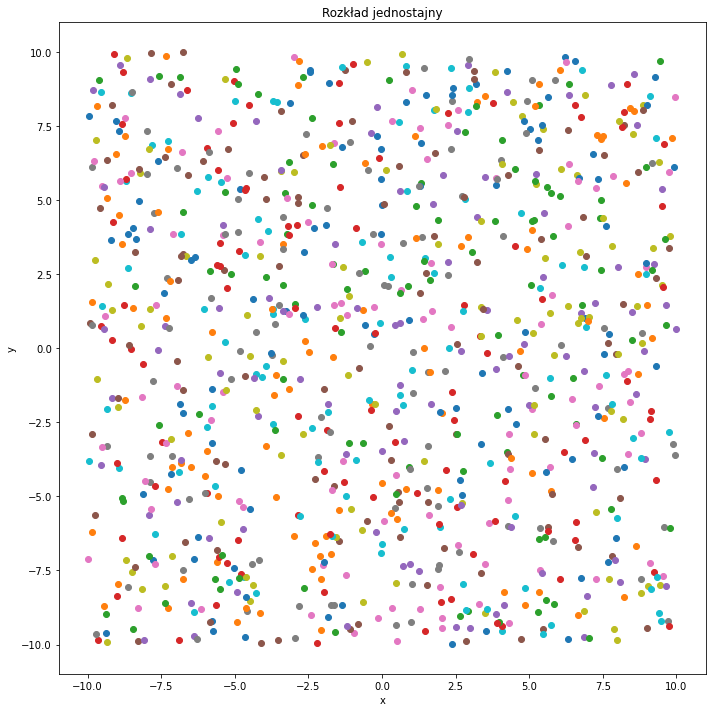

In [7]:
wyswietl_chmure( stworz_chmure("rozklad_jednostajny", 1000) , tytul="Rozkład jednostajny")

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


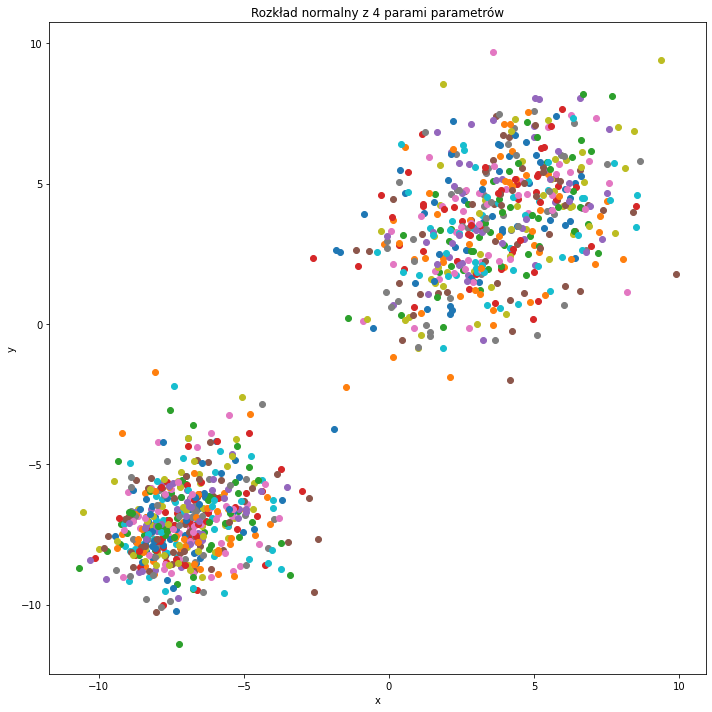

In [8]:
wyswietl_chmure( stworz_chmure("rozklad_normalny", 1000) , tytul="Rozkład normalny z 4 parami parametrów" )

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


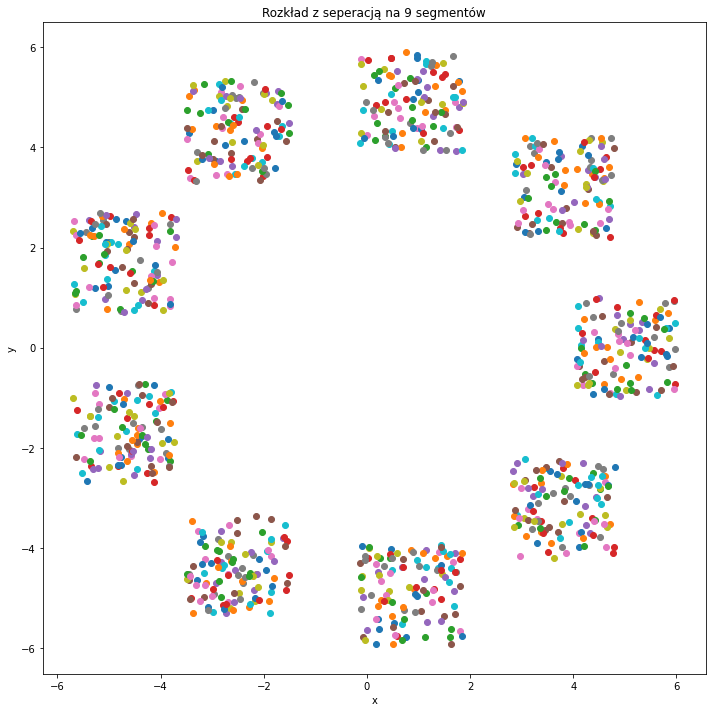

In [9]:
wyswietl_chmure( stworz_chmure("separacja", 1000)  , tytul="Rozkład z seperacją na 9 segmentów")


Teraz widzimy, że tworzenie "chmury" jest poprawne.


Zaimplementuję teraz własne wyżarzanie.


Wybór funkcji temperatury znacząco wpływa na wyniki szacowania najkrótszej drogi.

Po paru iteracjach wybrałem funkcję podaną w dokumentacji `scipy.optimize.dual_annealing`:

$T_{q_{v}}(t) = T_{q_{v}}(1) \frac{2^{q_{v}-1} -1}{(1+t)^{q_{v}-1}-1}$

In [10]:
T_1 = 5230

In [11]:
def temperatura(t):
    q_v = 2.0

    return T_1 * ( 2**(q_v - 1) - 1 ) / ( ( 1 + t )**(q_v - 1) - 1)


In [12]:
def P(e, e_prim, T):
    if e_prim < e:
        return 1
    else:
        return np.exp( -(e_prim - e)/T )

def energia_stanu(stan):
    dlugosc_sciezki = 0

    for id_miasta in range(len(stan) - 1):
        aa = (stan[id_miasta][0] - stan[id_miasta+1][0]) * (stan[id_miasta][0] - stan[id_miasta+1][0])
        bb = (stan[id_miasta][1] - stan[id_miasta+1][1]) * (stan[id_miasta][1] - stan[id_miasta+1][1])
        dlugosc_sciezki += np.sqrt( aa + bb )

    return dlugosc_sciezki

Energia stanu w przypadku prolemu komiwojażera to jest długość ścieżki, więc tutaj liczę sumę odległości punktów w ścieżce.


Teraz w samej funkcji wyżarzania implementuję dwie opcje:
 "arbitrary swap"(zamiana dwóch losowych miast) i "consecutive swap"(zamiana dwóch losowych, ale sąsiednich miast).


In [13]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        #T = temperatura( (k+1) / k_max )
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)
            
            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1
                
            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        else:
            print("Blad")
            return 0
        

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.5, 1.0, 1):
            obecny_stan = stan_iteracji

    return obecny_stan


Teraz brakuje nam jedynie funkcji rysującej samą ścieżkę:

In [14]:
def wyswietl_sciezke(chmura, tytul="Sciezka punktów", dlugosc=-1):
    fig1, axis = plt.subplots(figsize=(10,10))

    if dlugosc==-1:
        axis.set_title(tytul)
    else:
        axis.set_title(tytul + " | Długość: " + str(dlugosc))
    axis.set_xlabel("x")
    axis.set_ylabel("y")


    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])
    chmura=np.array(chmura)
    axis.plot(chmura[:,0], chmura[:,1])

    fig1.tight_layout()
    fig1.show()

Przechodzę do testów.


In [15]:
temp_w = 100
temp_k = 10000

#### Rozkład jednostajny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


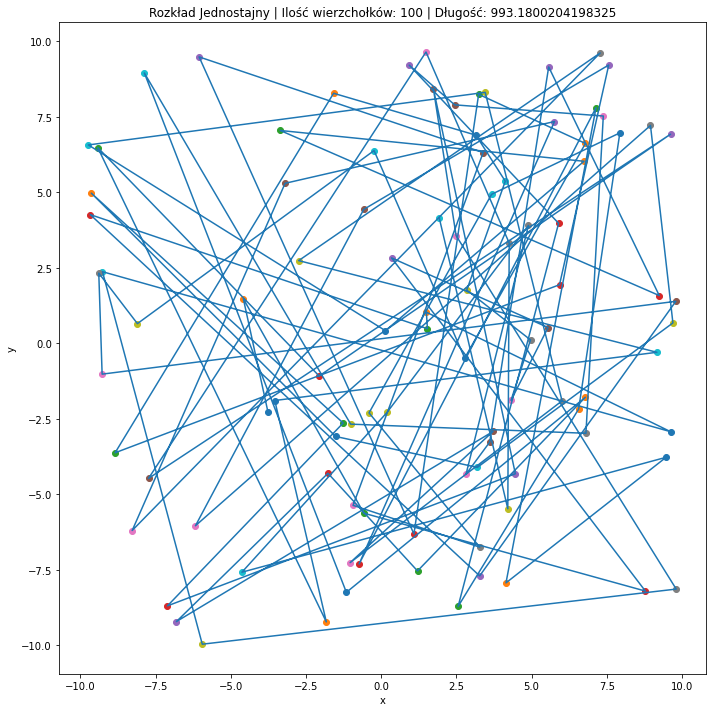

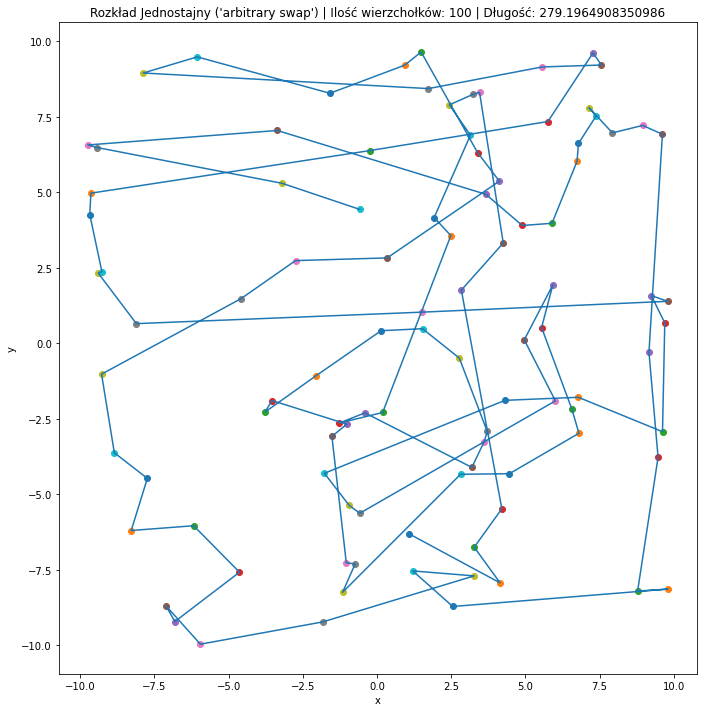

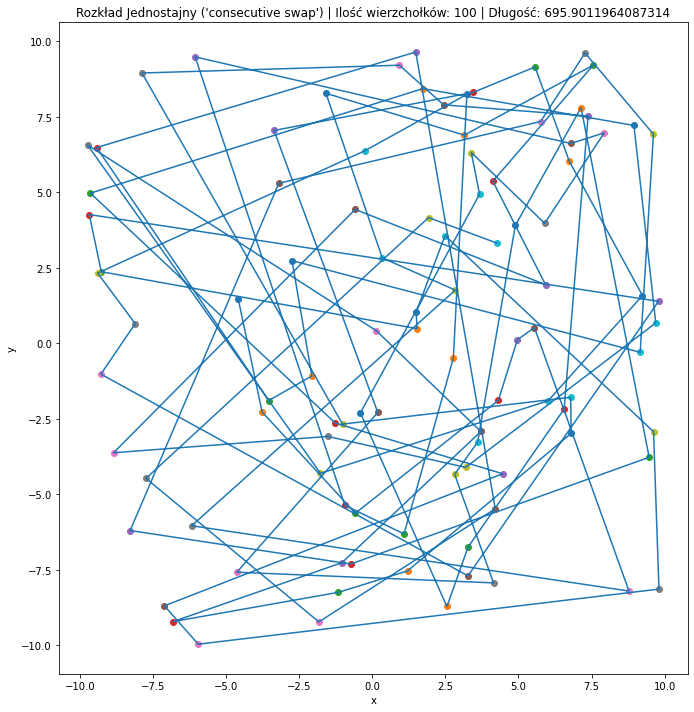

In [16]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


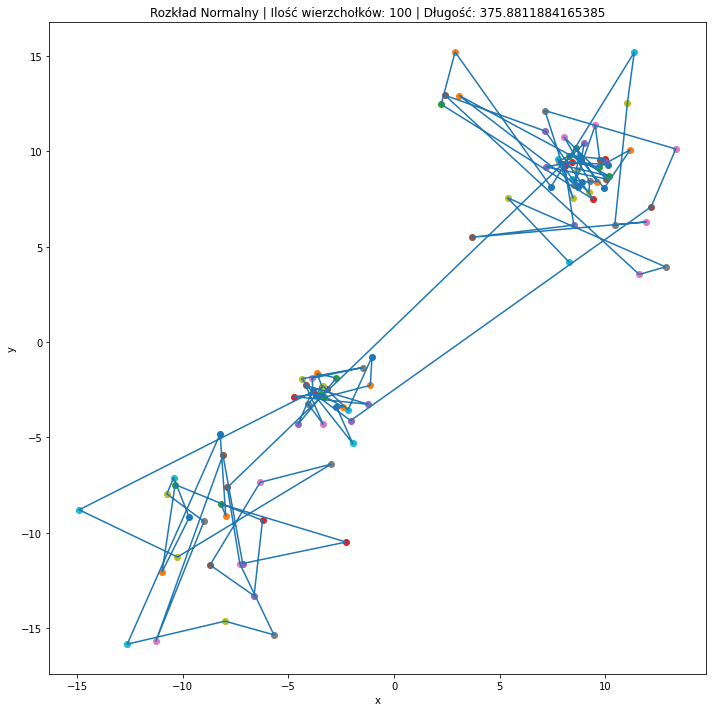

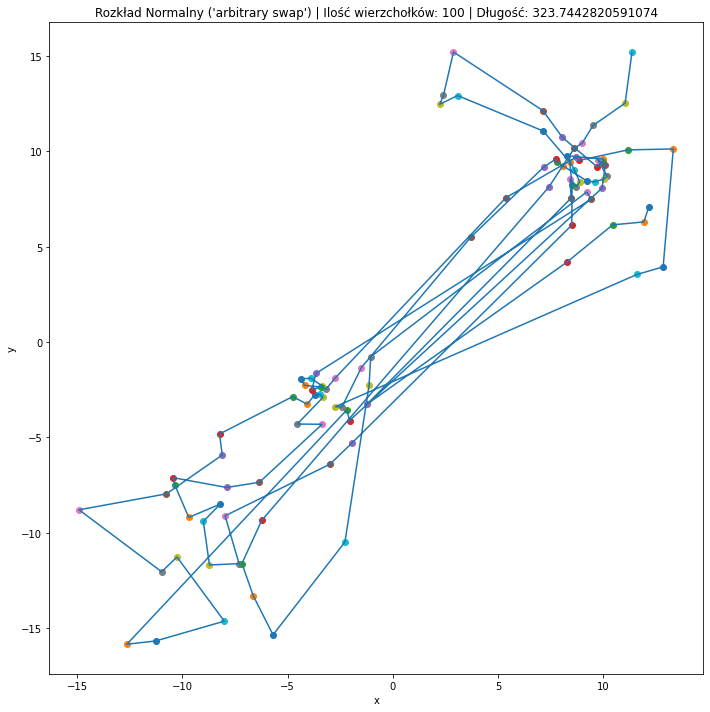

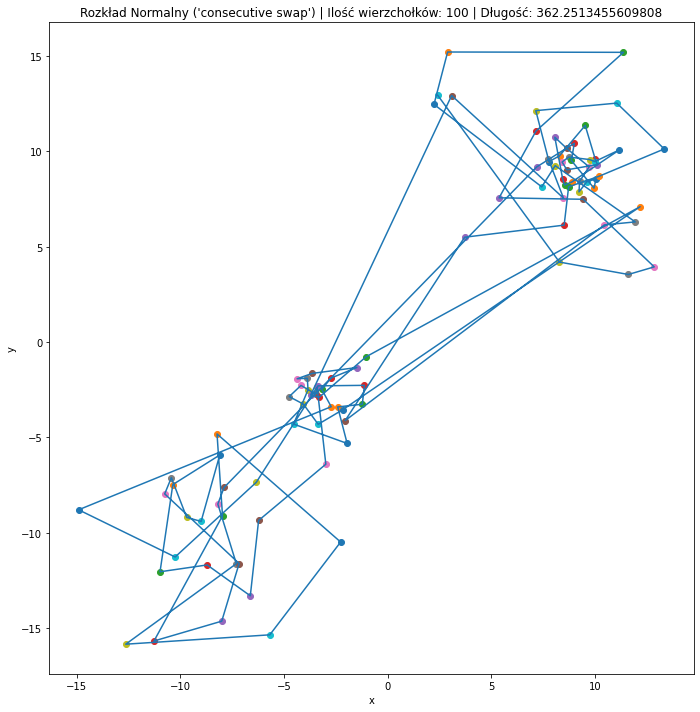

In [17]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


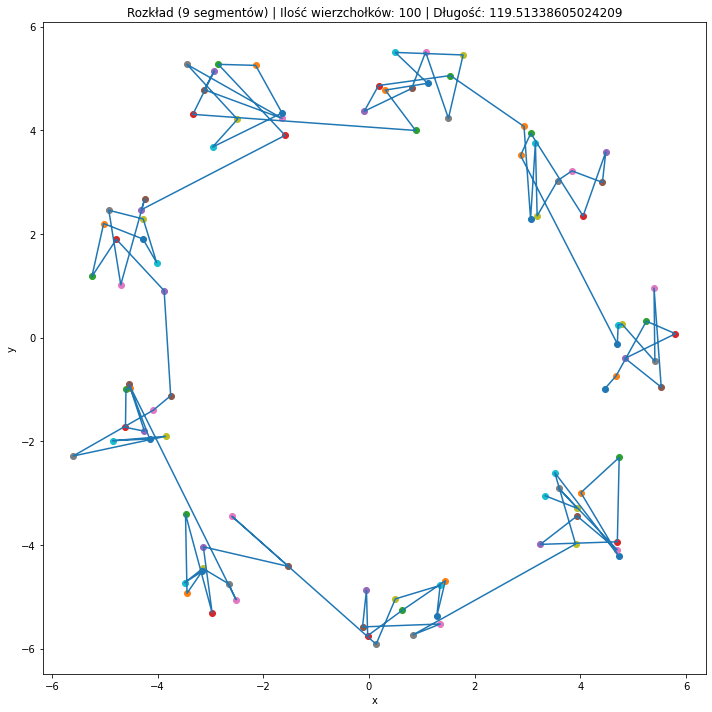

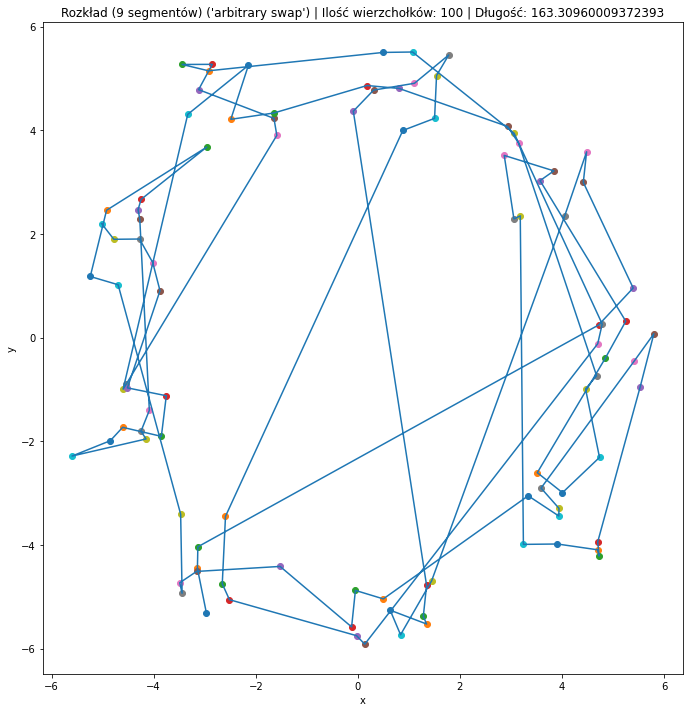

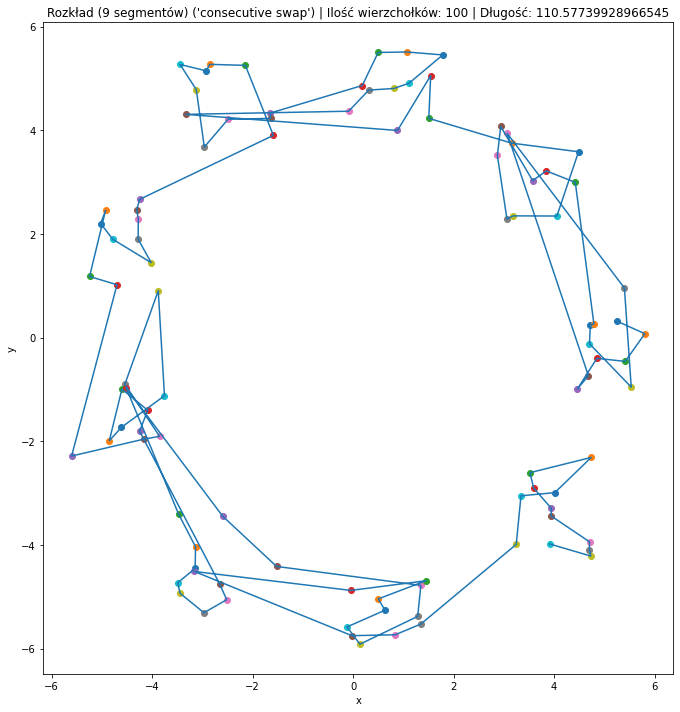

In [18]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Wyniki nie są do końca zadowalające. W przypadku rozkładu z podziałem na 9 zdarza się, że "krótsza ścieżka" jest dłuższa od tej pierwszej!

Temperatura jednak była ustawiona na 5230.

Wykonam testy ponownie, dla zmniejszonej wartości początkowej temperatury.

In [19]:
T_1 = 5230

#### Rozkład jednostajny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


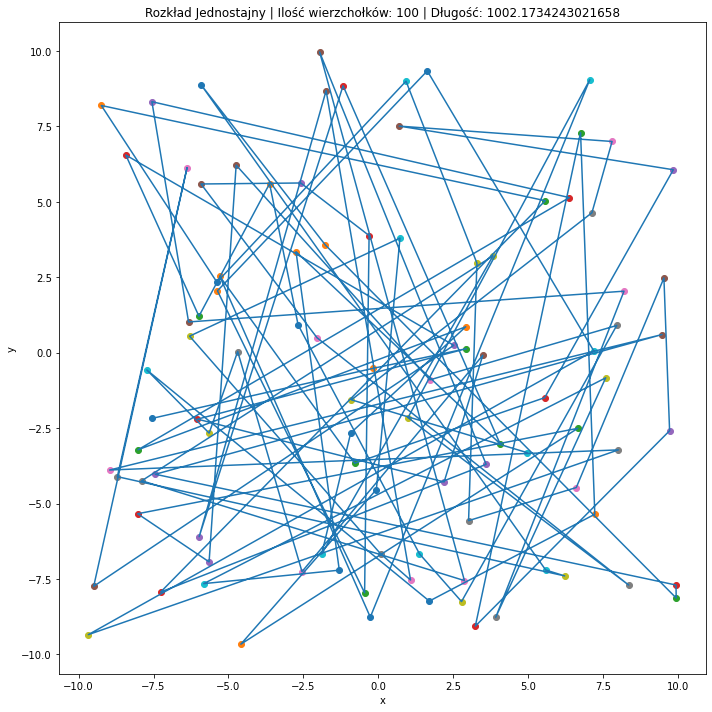

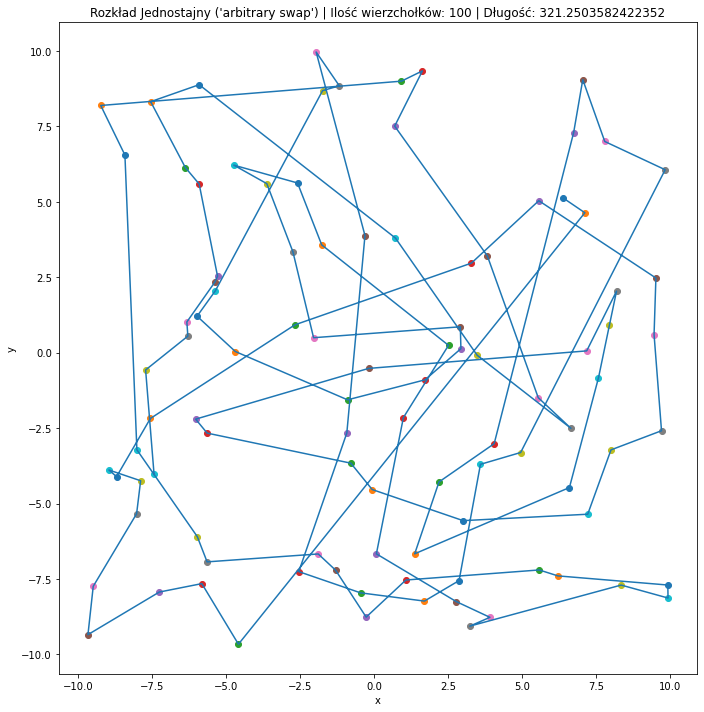

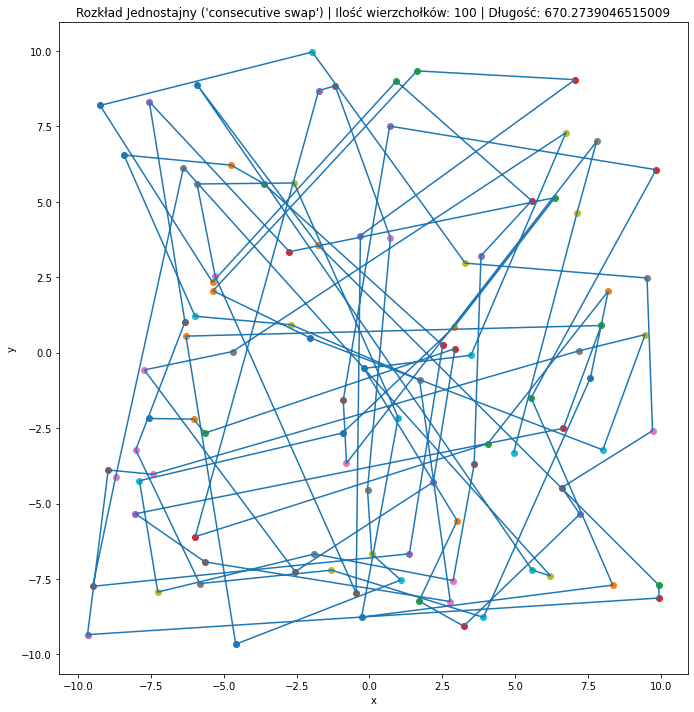

In [20]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


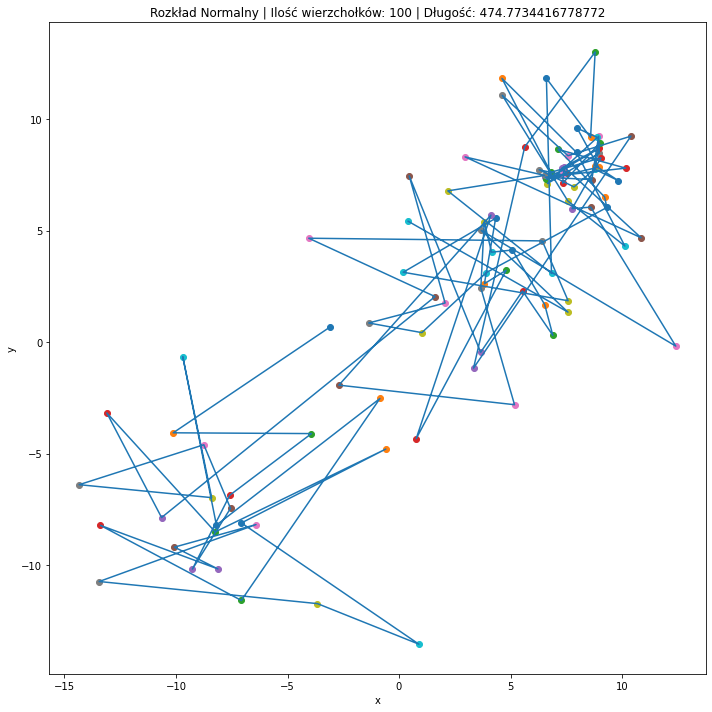

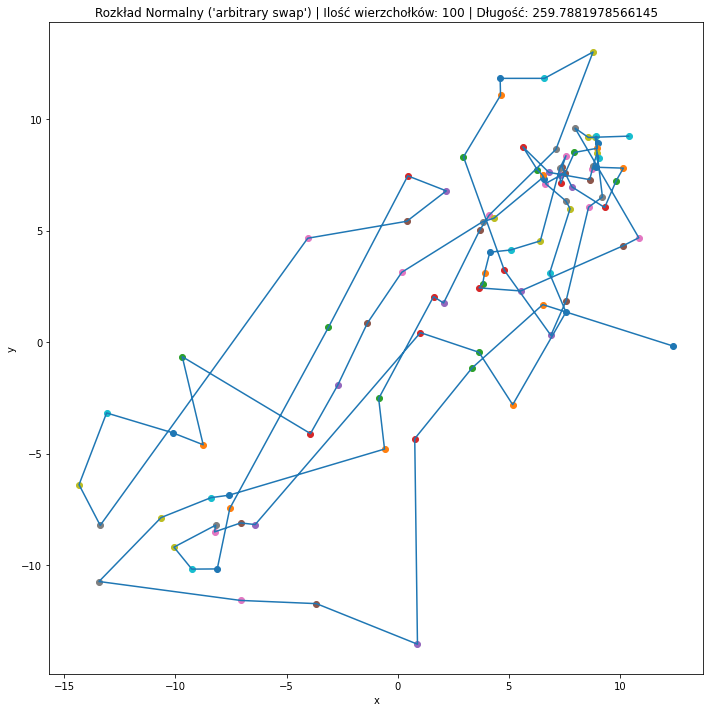

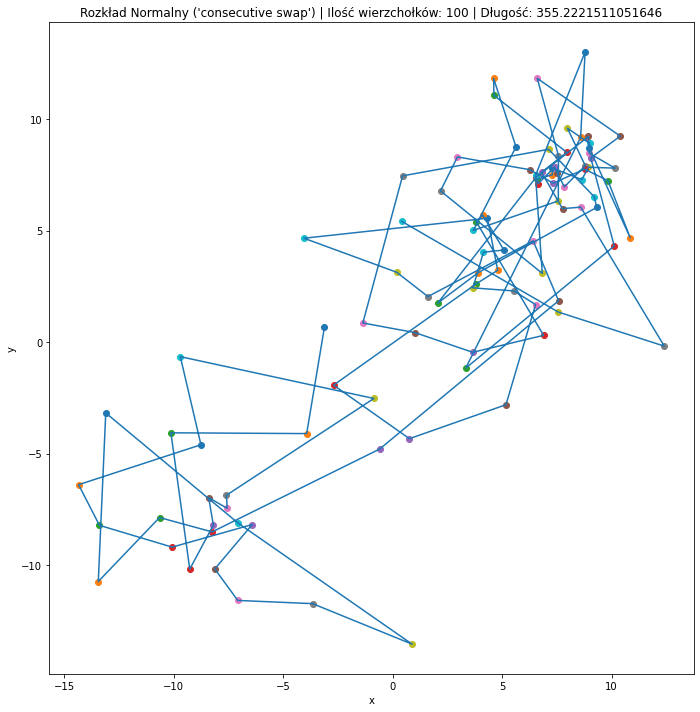

In [21]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


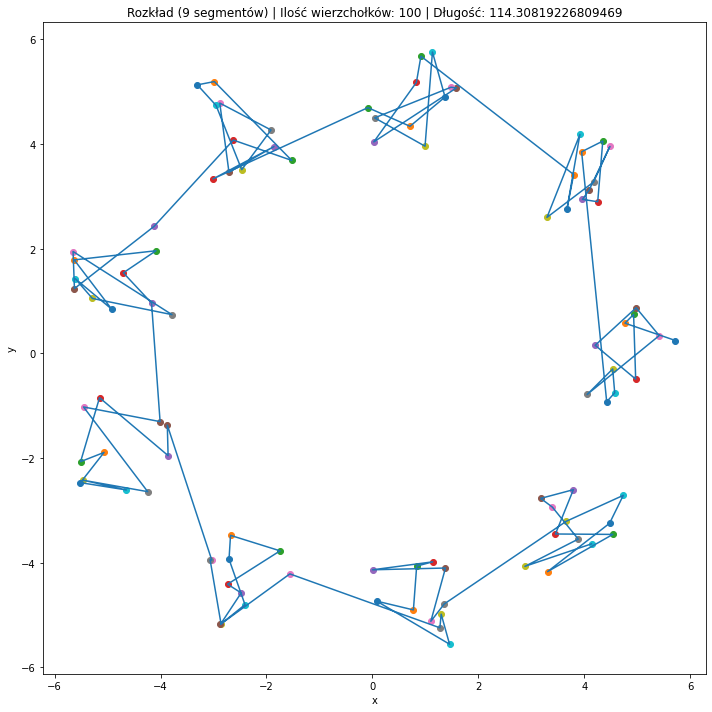

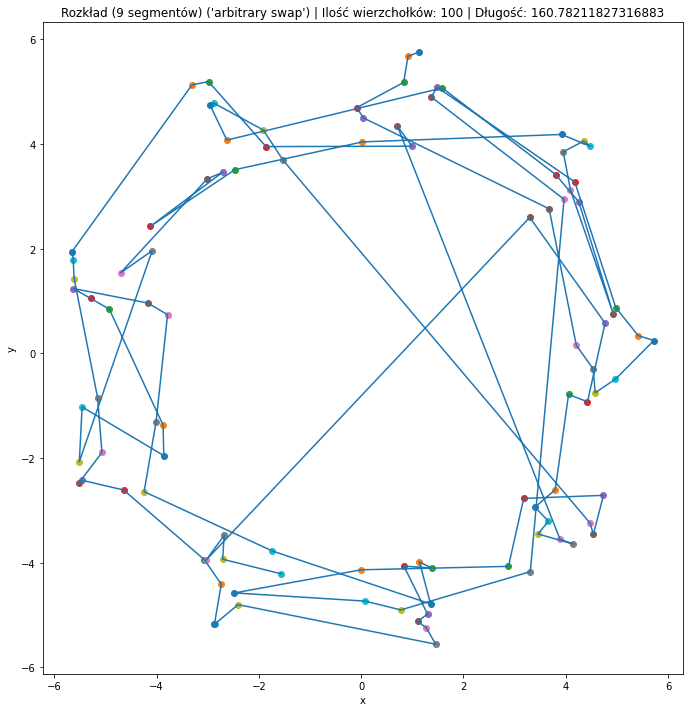

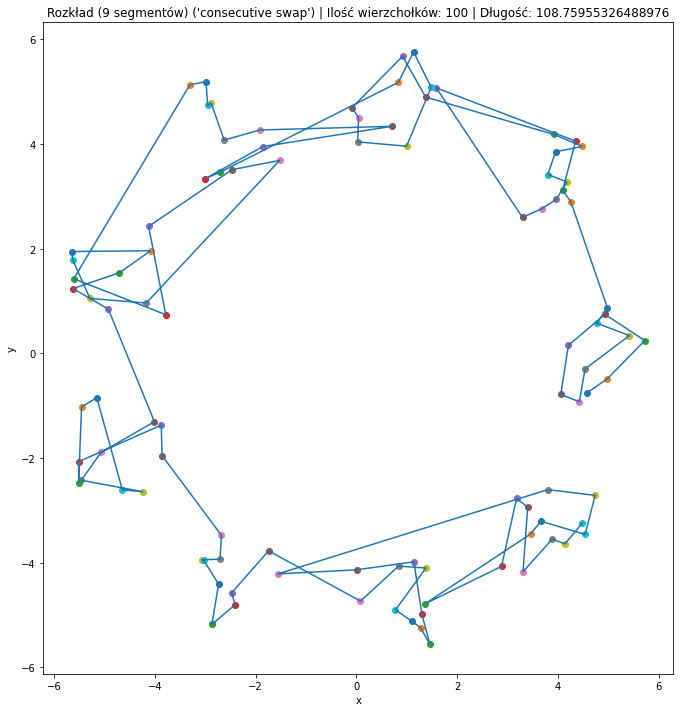

In [22]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))
